------------
----------

### Analyzing Train DF

##### Features importantes
* Pct Organic Visits - Se esse número é alto, isso quer dizer que a empresa depende de SEO para gerar receita. Números extremos perto de 0% e perto de 100% provavelmente estão errados/não são confiáveis
* SEO Visits -  Quanto maior esse número, em geral, mais poderoso é o time de SEO, e mais faz sentido investir numa tecnologia como a nossa. Abaixo de 1M de visitas orgãnicas ou acima de 500M não faz muito sentido. (deveríamos descartar esses entao?)
* Page Count - Quanto maior esse número, em geral, mais poderoso é o time de SEO, e mais faz sentido investir numa tecnologia como a nossa. Abaixo de 25K não faz muito sentido.

* Eliminate high correlated features to avoid multicollinearity.
* Perform some power transforms (such as log)(6.3 sklearn), to avoid features highly skewed.power transf

In [1]:
#knn para fill nan//try again

feature permutation, com variaveis corr

https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance_multicollinear.html#sphx-glr-auto-examples-inspection-plot-permutation-importance-multicollinear-py

https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html#sklearn.inspection.permutation_importance

https://contrib.scikit-learn.org/categorical-encoding/catboost.html

remove outliers

In [5]:
tuned_model = Model.load('../models_pkl/experiment-1-model.pkl')
tuned_model.model

LGBMClassifier(boosting_type='gbdt', class_weight=None,
               colsample_bytree=0.9555555555555555, importance_type='split',
               is_unbalance=True, learning_rate=0.0381814913064112,
               max_depth=-1, min_child_samples=60, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=71,
               objective=None, random_state=None,
               reg_alpha=0.061224489795918366, reg_lambda=0.5714285714285714,
               silent=True, subsample=0.7070707070707071,
               subsample_for_bin=140000, subsample_freq=0)

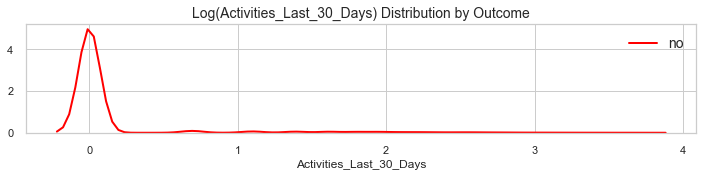

In [6]:
from plot_libraries import setup_graphics, dist_plot
X, y = get_data('../data/PredDF.csv')
numeric_outcome = pd.concat([X['Activities_Last_30_Days'],y], axis=1)
dist_plot(numeric_outcome, 'Activities_Last_30_Days', log=True)
#X['Activities_Last_30_Days'].value_counts()

In [9]:
from joblib import load
X, y = get_data('../data/trainDF.csv')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, stratify=y, random_state=20)
model = Model.load('../models_pkl/experiment-1-model.pkl')
exp1_pipeline = load('../models_pkl/experiment-1-pipeline.pkl')

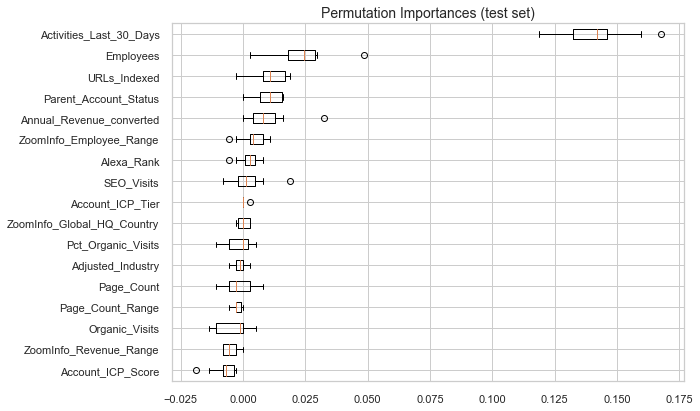

In [11]:
plot_feature_permutation(exp1_pipeline, model.model, X_train, y_train, X_test, y_test)

In [ ]:
#X, y = get_data('../data/trainDF.csv')
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, stratify=y, random_state=20)
model = Model.load('../models_pkl/experiment-1-model.pkl')
scorer = make_scorer(roc_auc_score)

In [ ]:
#shap valuyes
#hold metricas (no aguardo da 2.1)

In [ ]:
import scikitplot as skplt
probs = model.model.predict_proba(model.pipeline.transform(X_test))

In [ ]:
# Create a dataframe of probabilities and actual / predicted outcomes
probs_df = pd.DataFrame(np.hstack([probs, y_test.values.reshape(-1,1), preds.reshape(-1,1)]), 
                        columns=['p_no', 'p_yes', 'actual', 'predicted'])


# Sort customers by the probability that they will convert
model_targets = probs_df.sort_values('p_yes', ascending=False)

# Take the top 10%
model_targets = model_targets.head(n_targeted_test)

# Calculate precision matrix
plot_confusion_matrix(model_targets.actual, model_targets.predicted)

In [ ]:
model_targets.head()#n_targeted_test

In [ ]:
model_targets.head()#n_targeted_test